In [2]:
from bia_bob import bob
bob.__version__

'0.11.0'

In [4]:
from skimage.io import imread
import stackview

StackViewNDArray([[1, 0, 1, ..., 2, 2, 2],
                  [1, 1, 1, ..., 2, 2, 2],
                  [1, 1, 1, ..., 2, 2, 2],
                  ...,
                  [8, 8, 7, ..., 5, 4, 5],
                  [7, 7, 8, ..., 4, 4, 5],
                  [7, 8, 8, ..., 5, 5, 5]], dtype=uint8)
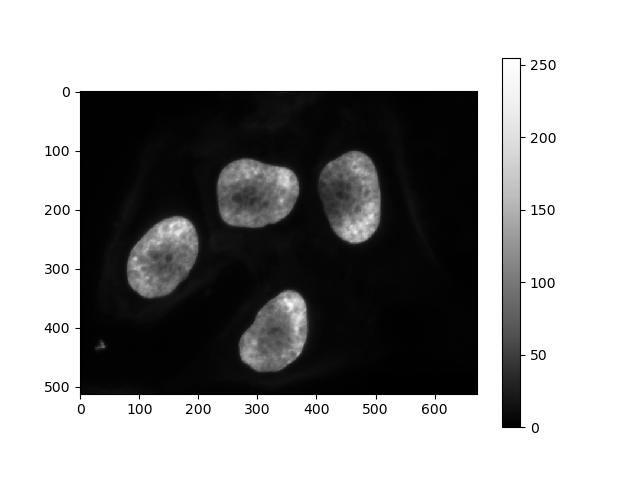
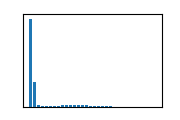

In [6]:
image = imread('hela-cells-8bit.tif')[:,:,2]
stackview.insight(image)

In [7]:
%%bob image
What's in this image? What would be a common segmentation algorithm that could segment the objects in this image?

You are looking at an image that appears to be a microscopic grayscale image showing several round, bright objects against a darker background. These objects may represent biological cells or other circular features.

Segmentation of such an image generally involves isolating the areas of interest (the bright objects) from the background. Here's a simple outline of steps that you might take to segment this image:

1. Preprocessing: Since the image appears to have some noise, it would benefit from preprocessing techniques like filtering to smooth out the noise without blurring the edges of the objects too much. A median filter or a Gaussian blur could be applied for this purpose.

2. Thresholding: Apply a thresholding technique to convert the grayscale image into a binary image where the cells become white (value of 1) and the background becomes black (value of 0). This could be done with a simple threshold if the contrast is high enough, or you might need more advanced methods like adaptive thresholding or Otsu's method if the intensity levels vary across the image.

3. Morphological Operations: After thresholding, there might be small unwanted artifacts or holes within the objects. Morphological operations like erosion, dilation, opening, and closing could help refine the segmentation by, for example, closing small gaps and removing tiny specks.

4. Object Detection: Once you have a binary image, you can identify connected components or use contour detection algorithms to detect each individual object. This step might include filtering out noise by discarding objects that are too small to be cells (based on an assumed size range).

5. Post-Processing: In some cases, segmented objects may touch or overlap. Post-processing might include separation of these clustered objects using watershed algorithms or distance transforms.

6. Analysis and Validation: Once the segmentation is done, the resulting binary image (or set of contours) can be used to calculate properties of the cells such as area, perimeter, or mean intensity. It's important to validate the segmentation results against known standards or manual segmentation to ensure accuracy.

The reason you would want to segment this image may depend on your goals. For example, if you're conducting biological research, you might want to count the cells, measure their size, shape, or intensity, or perhaps track changes over time. Effective segmentation is often a critical first step in image analysis in both medical and biological imaging contexts.

In [8]:
%bob write python code which does that

To segment the given image which appears to involve round, bright objects (such as cells) on a darker background, the following steps will be executed in Python:

1. Apply a Gaussian blur for noise reduction without significantly blurring the edges.
2. Use Otsu's method to convert the grayscale image into a binary image for clear segmentation. 
3. Apply morphological closing to fill small holes and ensure complete cell shapes.
4. Perform connected components labeling to identify and label individual objects.

